# Temperature Forecast Project using ML

## Problem Statement:

### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



## Importing the required libraries:

In [886]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import scipy
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [887]:
#displaying maximum columns
pd.set_option('display.max_columns',None)

#there is column called date, so we are using parse date for that column
df = pd.read_csv('temperature_prediction.csv',parse_dates= ['Date'])
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## Note : This data set has two Target columns

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

## EDA (Exploratory Data Analysis)

In [888]:
df.shape

(7752, 25)

we have 7752 rows and 25 columnn (including 2 target columns)

In [889]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [890]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

We can see that all the columns are float datatype , date column is date datetype

In [891]:
#lets check for null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

we can see that almost all the columns are having null values

## Statistical Summary

In [892]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Insights obtained from above Table :

The difference between 75th percentile and max is not much, So there is presence of less outliers

Standard Deviation is also very less for all the columns expect target variable , Means the data is less spreaded

Mean and median is almost same for every column, so the data almost normal distibuted

There are no null values in any columns

In [893]:
#lets check for correlation among all the columns
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,0.003414,0.000698,0.006159,-0.002748,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,-0.215816,-0.145513,-0.142497,-0.110001,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,0.091439,-0.002839,-0.045091,0.114312,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


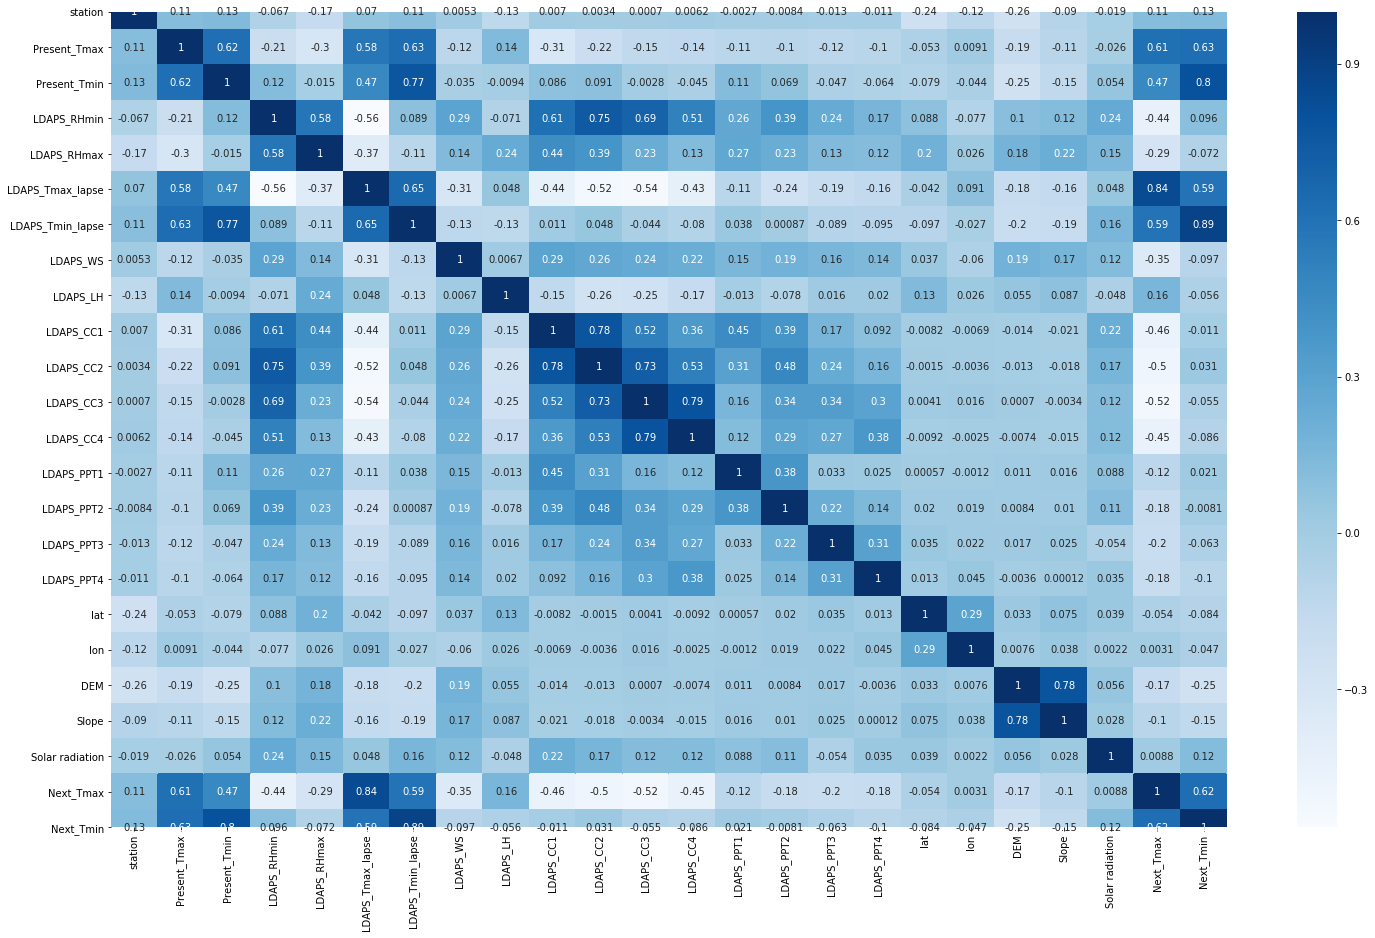

In [894]:
#correlation
fig = plt.figure(figsize=(25,15))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [895]:
#lets check for the correlation of input columns with first Target Variable (TMAX)
cor_matrix['Next_Tmax'].sort_values(ascending = False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.836144
Next_Tmin           0.621427
Present_Tmax        0.613109
LDAPS_Tmin_lapse    0.593195
Present_Tmin        0.473868
LDAPS_LH            0.159324
station             0.108306
Solar radiation     0.008809
lon                 0.003060
lat                -0.053567
Slope              -0.102838
LDAPS_PPT1         -0.120079
DEM                -0.172674
LDAPS_PPT2         -0.180449
LDAPS_PPT4         -0.180669
LDAPS_PPT3         -0.196845
LDAPS_RHmax        -0.286478
LDAPS_WS           -0.346592
LDAPS_RHmin        -0.442958
LDAPS_CC4          -0.451324
LDAPS_CC1          -0.457583
LDAPS_CC2          -0.496251
LDAPS_CC3          -0.520706
Name: Next_Tmax, dtype: float64

In [896]:
#lets check for the correlation of input columns with Second Target Variable (TMIN)
cor_matrix['Next_Tmin'].sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886964
Present_Tmin        0.799758
Present_Tmax        0.625252
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.591535
station             0.128719
Solar radiation     0.120400
LDAPS_RHmin         0.095830
LDAPS_CC2           0.031500
LDAPS_PPT1          0.021486
LDAPS_PPT2         -0.008131
LDAPS_CC1          -0.011129
lon                -0.046737
LDAPS_CC3          -0.055217
LDAPS_LH           -0.055895
LDAPS_PPT3         -0.063318
LDAPS_RHmax        -0.072490
lat                -0.083621
LDAPS_CC4          -0.085805
LDAPS_WS           -0.097390
LDAPS_PPT4         -0.104515
Slope              -0.147043
DEM                -0.247100
Name: Next_Tmin, dtype: float64

## Data PreProcessing

### Handling the Null values in the dataset

In [897]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [898]:
#we can see that all the belows column are null for the same rows

#LDAPS_RHmin         75
#LDAPS_RHmax         75
#LDAPS_Tmax_lapse    75
#LDAPS_Tmin_lapse    75
#LDAPS_WS            75
#LDAPS_LH            75
#LDAPS_CC1           75
#LDAPS_CC2           75
#LDAPS_CC3           75
#LDAPS_CC4           75
#LDAPS_PPT1          75
#LDAPS_PPT2          75
#LDAPS_PPT3          75
#LDAPS_PPT4          75

df.loc[df.LDAPS_RHmin.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1025,1.0,2013-10-08,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3
1026,2.0,2013-10-08,29.7,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2
1027,3.0,2013-10-08,29.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0
1028,4.0,2013-10-08,30.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5
1029,5.0,2013-10-08,29.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,21.0,2016-08-20,34.1,27.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5507,127.040,26.2980,0.5721,4795.120117,35.5,27.5
5946,22.0,2016-08-20,34.3,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5102,127.086,21.9668,0.1332,4782.181641,36.2,27.5
5947,23.0,2016-08-20,34.6,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5372,126.891,15.5876,0.1554,4783.152832,37.3,28.8
5948,24.0,2016-08-20,35.0,28.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5237,126.909,17.2956,0.2223,4778.877930,37.0,28.7


In [899]:
#we can see that all the belows column are null for the same rows
#Present_Tmax        70
#Present_Tmin        70

df.loc[df.Present_Tmax.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,2013-09-07,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,0.890438,0.634022,0.371975,0.352818,2.645991,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5925.883789,23.4,22.0
271,22.0,2013-10-07,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,0.796409,0.570621,0.736160,0.689160,0.022148,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,5772.487305,26.1,24.1
300,1.0,2013-12-07,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,0.857962,0.966186,0.959959,0.902762,4.435039,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.7850,5893.265625,23.2,20.5
450,1.0,2013-07-18,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,0.392393,0.219702,0.293890,0.178251,0.000000,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.7850,5812.293457,27.6,21.8
464,15.0,2013-07-18,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,0.517181,0.231422,0.276836,0.203288,0.000000,0.000000,0.000000,0.008702,37.5507,126.937,30.0464,0.8552,5681.875000,30.7,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,5.0,2017-08-24,NaN,NaN,38.403931,94.790405,29.929818,22.127591,5.817882,145.726477,0.104200,0.060662,0.015014,0.029818,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,4677.062012,31.3,21.5
7596,22.0,2017-08-24,NaN,NaN,33.681381,91.842178,30.826400,22.978260,5.994230,103.179477,0.118850,0.107481,0.021829,0.039001,0.000000,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,4672.853027,31.6,22.4
7605,6.0,2017-08-25,NaN,NaN,24.100304,76.861076,28.999651,20.800666,6.511712,71.307767,0.000000,0.007118,0.057306,0.044800,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,4653.651855,29.5,21.5
7629,5.0,2017-08-26,NaN,NaN,43.755058,83.340240,25.842338,18.532986,4.926595,97.230757,0.079172,0.370131,0.391996,0.545452,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,4602.118164,26.1,17.9


### Since all the columns are numerical, Before replacing the outliers we need check for the following citeria:
    

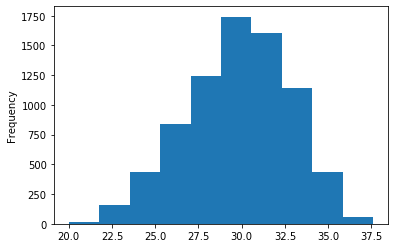

In [900]:
#lets check the distribution of this column
df.Present_Tmax.plot.hist()
plt.show()

In [901]:
# Above column is normal distributed so lets replace outliers with mean
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(),inplace= True)

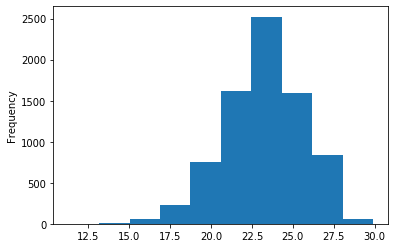

In [902]:
#lets check the distribution of this column
df.Present_Tmin.plot.hist()
plt.show()

In [903]:
# Above column is not normal distributed so lets replace outliers with median
df['Present_Tmin'].fillna(df['Present_Tmin'].median(),inplace= True)

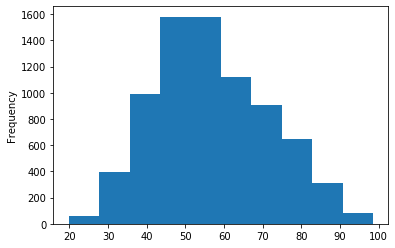

In [904]:
#lets check the distribution of this column
df.LDAPS_RHmin.plot.hist()
plt.show()

In [905]:
# Above column is normal distributed so lets replace outliers with mean
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(),inplace= True)

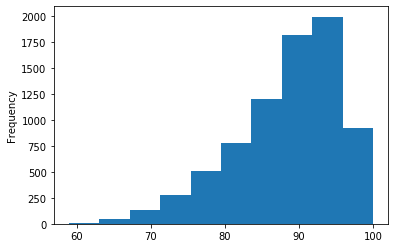

In [906]:
#lets check the distribution of this column
df.LDAPS_RHmax.plot.hist()
plt.show()

In [907]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median(),inplace= True)

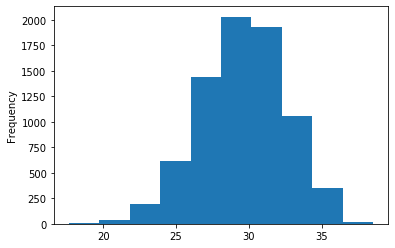

In [908]:
#lets check the distribution of this column
df.LDAPS_Tmax_lapse.plot.hist()
plt.show()

In [909]:
# Above column is normal distributed so lets replace outliers with mean
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(),inplace= True)

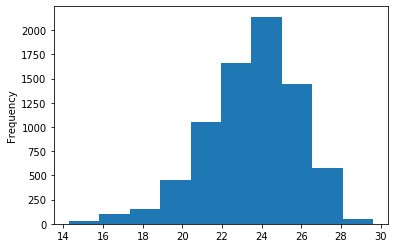

In [910]:
#lets check the distribution of this column
df.LDAPS_Tmin_lapse.plot.hist()
plt.show()

In [911]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].median(),inplace= True)

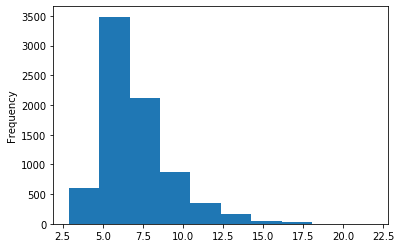

In [912]:
#lets check the distribution of this column
df.LDAPS_WS.plot.hist()
plt.show()

In [913]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_WS'].fillna(df['LDAPS_WS'].median(),inplace= True)

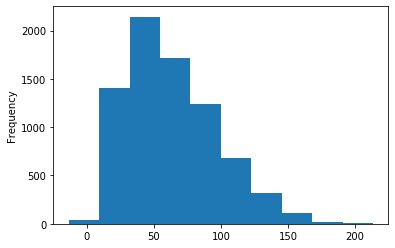

In [914]:
#lets check the distribution of this column
df.LDAPS_LH.plot.hist()
plt.show()

In [915]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_LH'].fillna(df['LDAPS_LH'].median(),inplace= True)

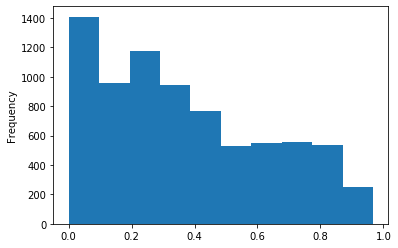

In [916]:
#lets check the distribution of this column
df.LDAPS_CC1.plot.hist()
plt.show()

In [917]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].median(),inplace= True)

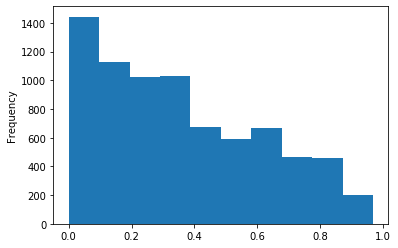

In [918]:
#lets check the distribution of this column
df.LDAPS_CC2.plot.hist()
plt.show()

In [919]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].median(),inplace= True)

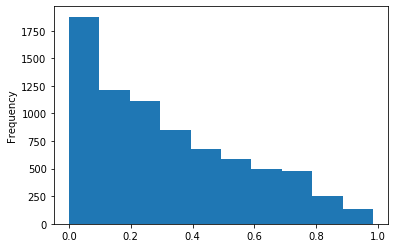

In [920]:
#lets check the distribution of this column
df.LDAPS_CC3.plot.hist()
plt.show()

In [921]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median(),inplace= True)

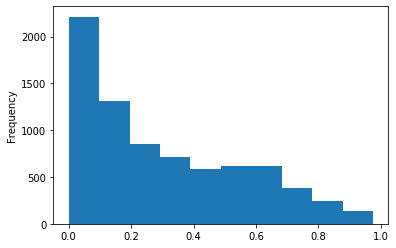

In [922]:
#lets check the distribution of this column
df.LDAPS_CC4.plot.hist()
plt.show()

In [923]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median(),inplace= True)

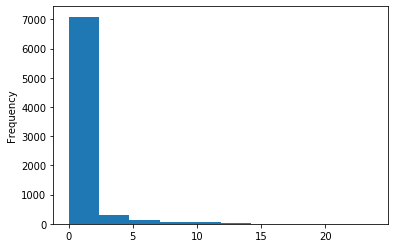

In [924]:
#lets check the distribution of this column
df.LDAPS_PPT1.plot.hist()
plt.show()

In [925]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].median(),inplace= True)

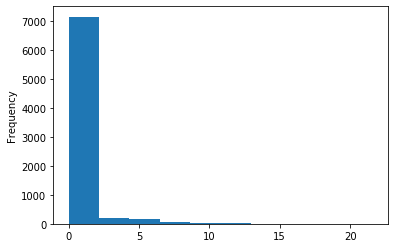

In [926]:
#lets check the distribution of this column
df.LDAPS_PPT2.plot.hist()
plt.show()

In [927]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].median(),inplace= True)

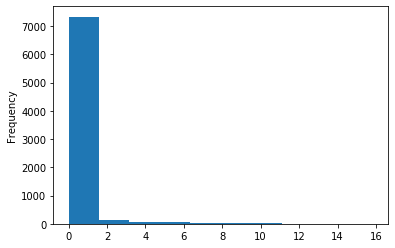

In [928]:
#lets check the distribution of this column
df.LDAPS_PPT3.plot.hist()
plt.show()

In [929]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].median(),inplace= True)

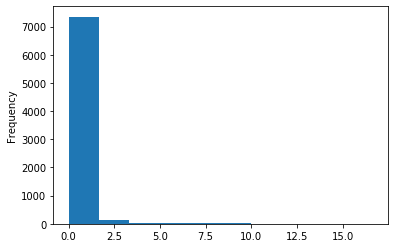

In [930]:
#lets check the distribution of this column
df.LDAPS_PPT4.plot.hist()
plt.show()

In [931]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].median(),inplace= True)

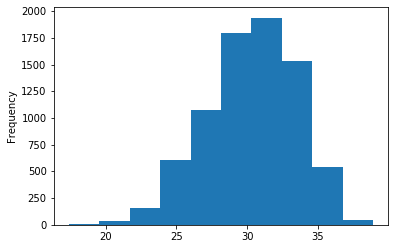

In [932]:
#lets check the distribution of this column
df.Next_Tmax.plot.hist()
plt.show()

In [933]:
# Above column is normal distributed so lets replace outliers with mean
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(),inplace= True)

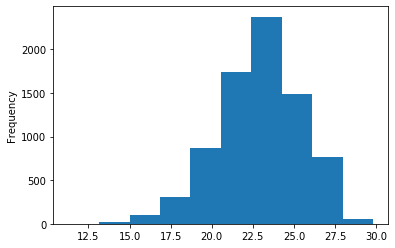

In [934]:
#lets check the distribution of this column
df.Next_Tmin.plot.hist()
plt.show()

In [935]:
# Above column is  almost normal distributed so lets replace outliers with mean
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(),inplace= True)

In [936]:
#lets check for null values now
for i in df.columns:
    if df[i].isnull().sum() > 1:
        print(i,df[i].isnull().sum())

station 2
Date 2


In [937]:
station_mode = df['station'].mode()[0]
station_mode

1.0

In [938]:
#still we have two null values for each of the two columns columns
#station column should be converted to  object datatype, since stattion is not numerical value
#so for station column, we can replace null values with mean or median, it has to replaced with mode
station_mode = df['station'].mode()[0]
df['station'] = df['station'].replace(np.nan,station_mode)

In [939]:
df.station.isnull().sum()

0

In [940]:
#for date column since we have only two rows which is less than 0.01 percent
#if there were many null values in this column, we could have extracted mode of date, month and year
#we can drop the rows with null values
df.dropna(axis = 0, inplace = True)

In [941]:
#now two rows have been dropped from this dataset

In [942]:
#now there are no null values in this dataset
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [943]:
df.shape

(7750, 25)

## Feature Extraction

In [944]:
#Lets Extracct the month from the date column, since the temperature of depends on month 
#lets also extract the year aswell 

In [945]:
#lets create a column called month
df['Month'] = df.Date.dt.month

In [946]:
#lets create a column called year
df['Year'] = df.Date.dt.year

In [947]:
#lets check it out
df.loc[:,['Date','Year','Month']]

,Date,Year,Month
0,2013-06-30,2013,6
1,2013-06-30,2013,6
2,2013-06-30,2013,6
3,2013-06-30,2013,6
4,2013-06-30,2013,6
...,...,...,...
7745,2017-08-30,2017,8
7746,2017-08-30,2017,8
7747,2017-08-30,2017,8
7748,2017-08-30,2017,8


In [948]:
#so now we have extracted the useful data from the month, lets drop the date column
df.drop('Date',axis =1 , inplace = True)

In [949]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,2013


### Converting some columns from float to Object

In [950]:
#we know that station , Month and year are not float datatypes
#so lets convert them into object datatype

df['station'] = df['station'].astype('object')   #station
df['Month'] = df['Month'].astype('object')      #month
df['Year'] = df['Year'].astype('object')       #year

In [951]:
df.dtypes

station              object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Month                object
Year                 object
dtype: object

In [952]:
#now station, month and year are coonverted into object datatypes

In [953]:
#lets check the unique values in each columns
int_to_object = ['station','Month','Year']
for i in int_to_object:
    print(df[i].value_counts())

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
24.0    310
14.0    310
15.0    310
16.0    310
17.0    310
18.0    310
19.0    310
20.0    310
21.0    310
22.0    310
23.0    310
1.0     310
Name: station, dtype: int64
7     2625
8     2500
6      375
12     250
11     250
10     250
9      250
5      250
4      250
3      250
2      250
1      250
Name: Month, dtype: int64
2017    1550
2016    1550
2015    1550
2014    1550
2013    1550
Name: Year, dtype: int64


In [954]:
#data  is almost qually spreded in all three columns
#except station 7 and 8 have 2625 and 2500, rest all stations are having 250 rows 

## Data Visualization:

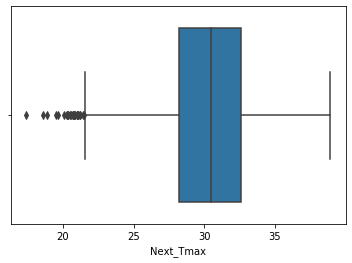

In [955]:
#lets check the box plot of our first target column Next_Tmax, to check if there are outliers
sns.boxplot(df.Next_Tmax)
plt.show()

In [956]:
#we can see there are outliers in our first target column Next_Tmax

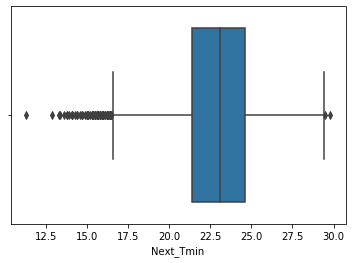

In [957]:
#lets check the box plot of our second target column Next_Tmin, to check if there are outliers
sns.boxplot(df.Next_Tmin)
plt.show()

In [958]:
#we can see there are outliers in our second target column Next_Tmin

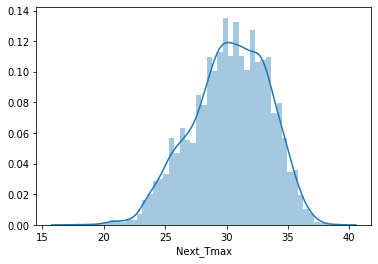

In [959]:
#lets check the distribution of our first target column Next_Tmax
sns.distplot(df.Next_Tmax)
plt.show()

In [960]:
#Our first target column Next_Tmax is almost normal distributed

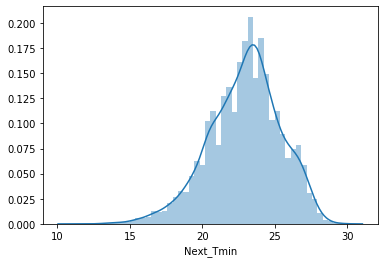

In [961]:
#lets check the distribution of our Second target column Next_Tmin
sns.distplot(df.Next_Tmin)
plt.show()

In [962]:
#Our second target column Next_Tmin is slightly skewed

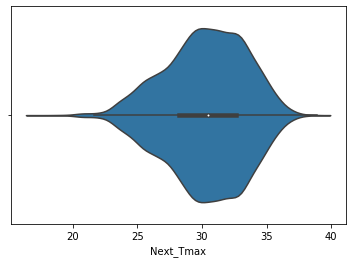

In [963]:
#lets check the violin plot of our First target column Next_Tmax
sns.violinplot(df.Next_Tmax)
plt.show()

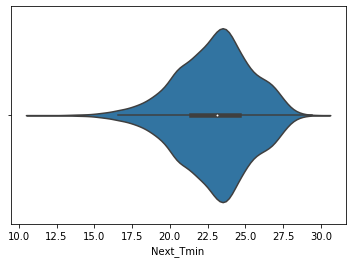

In [964]:
#lets check the violin plot of our Second target column Next_Tmin
sns.violinplot(df.Next_Tmin)
plt.show()

### Bivariate Analysis with First Target Variable Next_Tmax

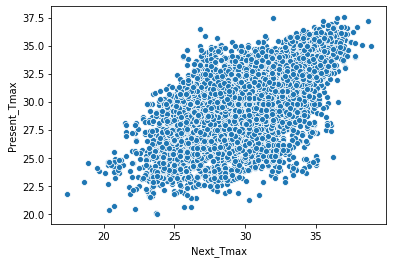

In [965]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['Present_Tmax'] )
plt.show()
#we can see from below plot , This column is having positive correlation with our target variable

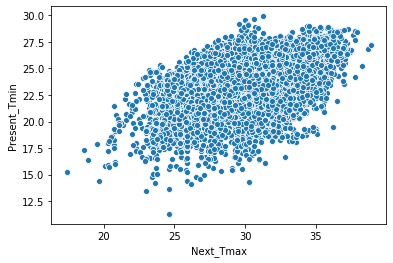

In [966]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['Present_Tmin'] )
plt.show()
#we can see from below plot , This column is having positive correlation with our target variable

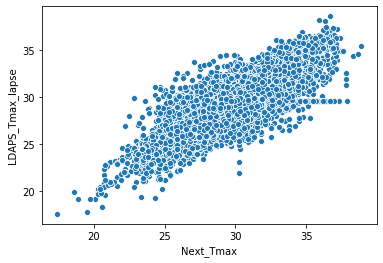

In [967]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_Tmax_lapse'] )
plt.show()
#we can see from below plot , This column is having positive correlation with our target variable

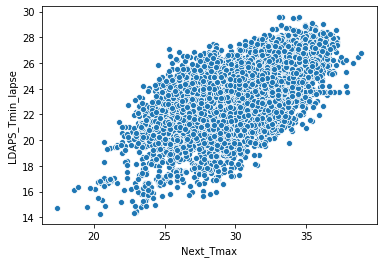

In [968]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_Tmin_lapse'] )
plt.show()
#we can see from below plot , This column is having positive correlation with our target variable

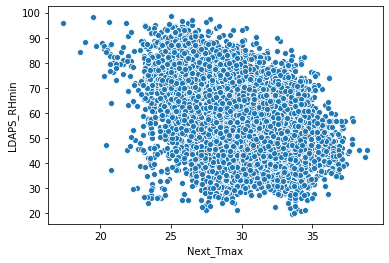

In [969]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_RHmin'] )
plt.show()
#we can see from below plot , This column is having slightly negative correlation with our target variable

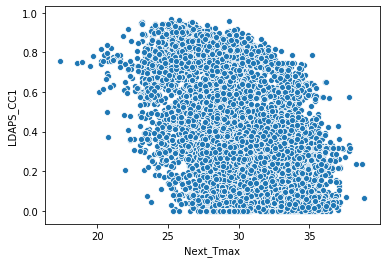

In [970]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_CC1'] )
plt.show()
#we can see from below plot , This column is having slightly negative correlation with our target variable

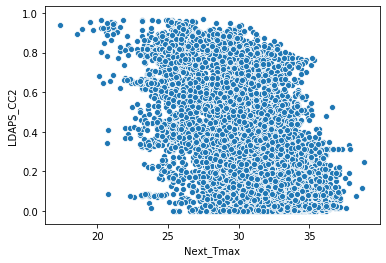

In [971]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_CC2'] )
plt.show()
#we can see from below plot , This column is having slightly less negative correlation with our target variable

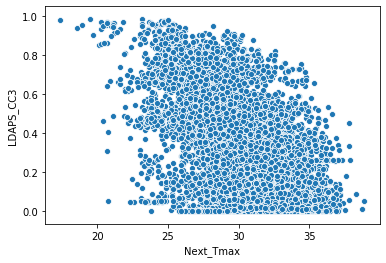

In [972]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_CC3'] )
plt.show()
#we can see from below plot , This column is having slightly less negative correlation with our target variable

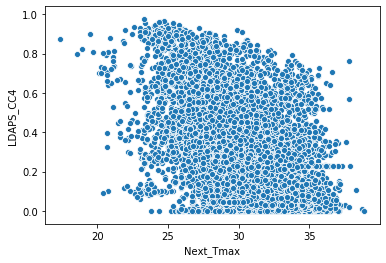

In [973]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_CC4'] )
plt.show()
#we can see from below plot , This column is having slightly less negative correlation with our target variable

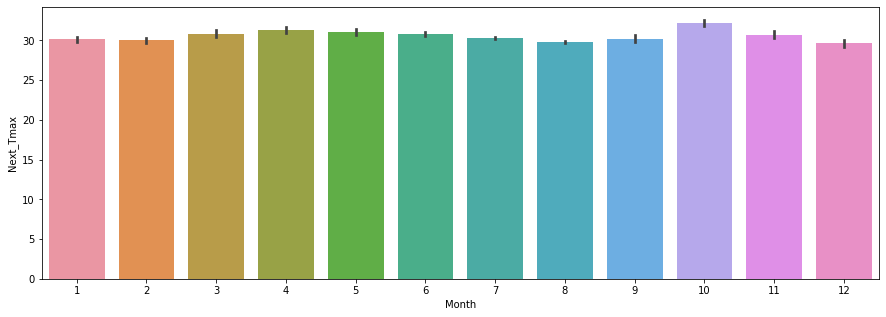

In [974]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
sns.barplot(x = df['Month'] , y =df['Next_Tmax'] )
plt.show()

In [975]:
#we can see tempearature quite high in October (10) compare to other months 

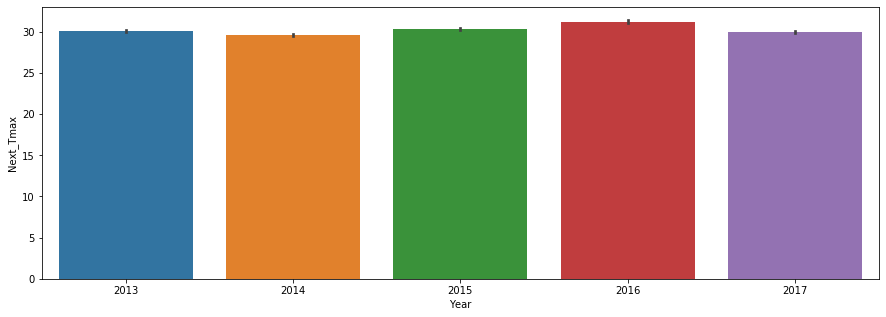

In [976]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
sns.barplot(x = df['Year'] , y =df['Next_Tmax'] )
plt.show()

In [977]:
#Temperature is almost same for all the year,In 2016 it was is slighly high

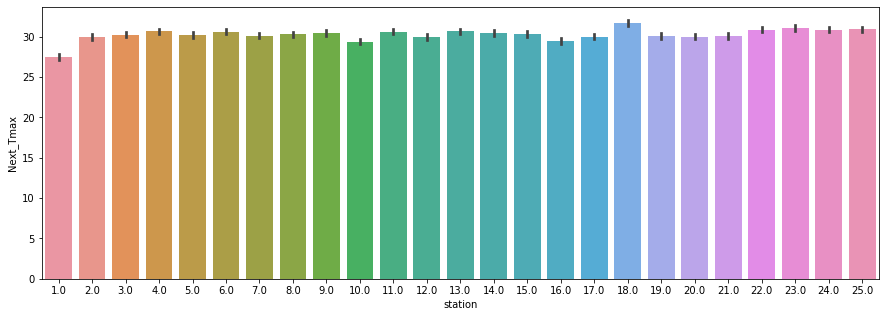

In [978]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
sns.barplot(x = df['station'] , y =df['Next_Tmax'] )
plt.show()

In [979]:
#we can see that temperature noted in station 18 is quite high compare to other stations

### Bivariate Analysis with Second Target Variable Next_Tmin

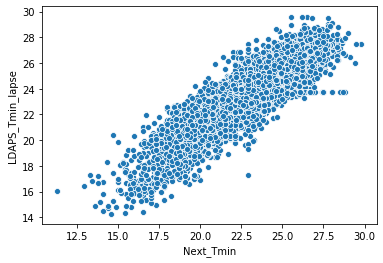

In [980]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['LDAPS_Tmin_lapse'] )
plt.show()
#we can see from below plot , This column is having positive correlation with our target variable

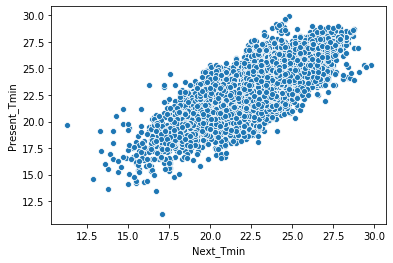

In [981]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['Present_Tmin'] )
plt.show()
#we can see from below plot , This column is having positive correlation with our target variable

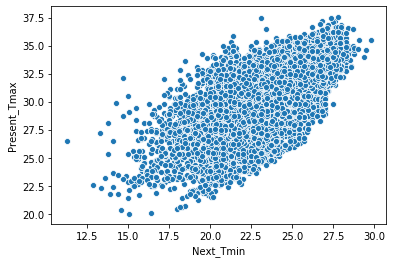

In [982]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['Present_Tmax'] )
plt.show()
#we can see from below plot , This column is having positive correlation with our target variable

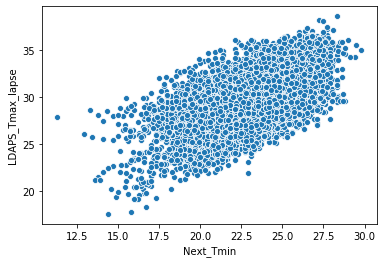

In [983]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['LDAPS_Tmax_lapse'] )
plt.show()
#we can see from below plot , This column is having positive correlation with our target variable

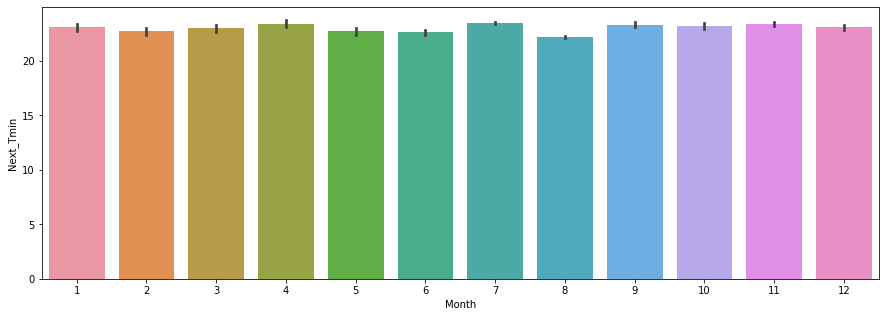

In [984]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
sns.barplot(x = df['Month'] , y =df['Next_Tmin'] )
plt.show()

In [985]:
#we can see tempearature quite low in August (8) compare to other months 

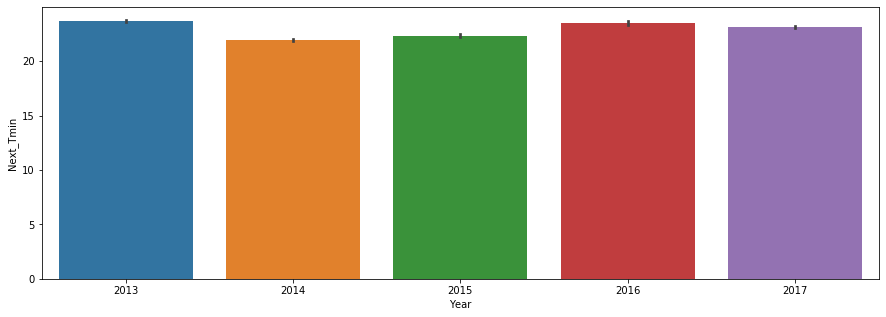

In [986]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
sns.barplot(x = df['Year'] , y =df['Next_Tmin'] )
plt.show()

In [987]:
#Temperature is slighly low in year 2014

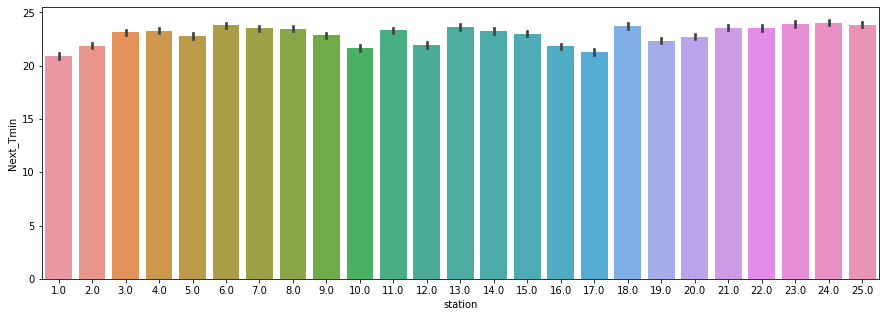

In [988]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
sns.barplot(x = df['station'] , y =df['Next_Tmin'] )
plt.show()

In [989]:
#Temperature noted in station 1 is quite low compare to others

## Outlier Removal :

In [990]:
#lets create a list of numerical columns for outliers removal

Numerical_columns = []
for i in df.columns:
    if df[i].dtype != 'object':
        Numerical_columns.append(i)
Numerical_columns


['Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

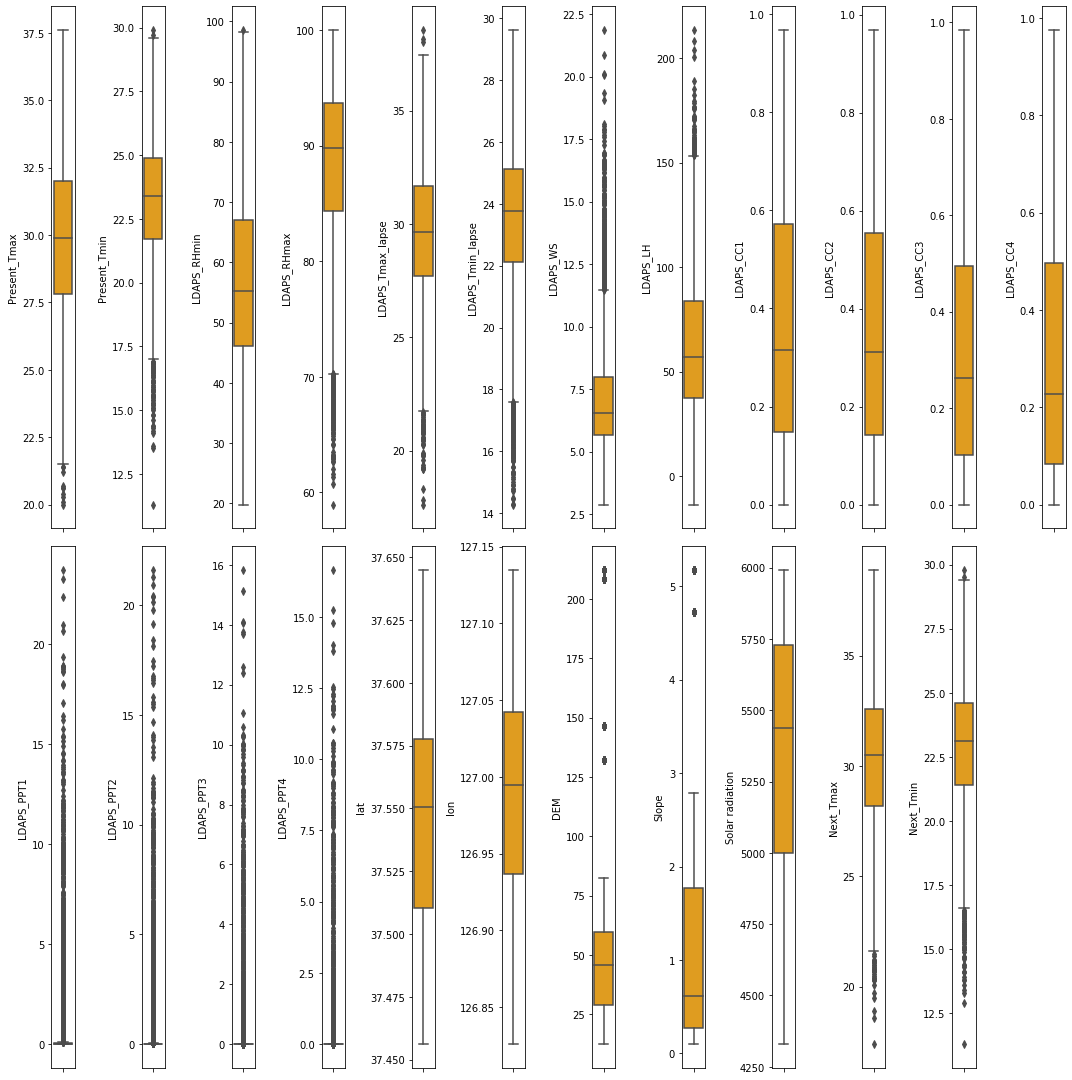

In [991]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 12
nrows = 8
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

In [992]:
#Lets check the value counts of these columns

for i in range(1,5):
    col_name = 'LDAPS_PPT{}'.format(i)
    print('\n')
    print(col_name)
    print(df[col_name].value_counts())



LDAPS_PPT1
0.000000    4918
0.001953      11
0.002604       5
0.001734       3
0.000459       2
            ... 
0.935344       1
6.001337       1
0.083498       1
0.188553       1
1.229075       1
Name: LDAPS_PPT1, Length: 2812, dtype: int64


LDAPS_PPT2
0.000000    5225
0.001953       7
0.000781       3
0.000040       3
0.002604       2
            ... 
0.085236       1
0.041993       1
0.002633       1
0.039292       1
0.109433       1
Name: LDAPS_PPT2, Length: 2510, dtype: int64


LDAPS_PPT3
0.000000    5368
0.001953      10
0.000852       4
0.002604       3
0.000864       2
            ... 
0.718585       1
0.041803       1
0.398969       1
0.284441       1
0.527748       1
Name: LDAPS_PPT3, Length: 2356, dtype: int64


LDAPS_PPT4
0.000000    5825
0.001953       3
0.000539       2
0.001065       2
0.001105       2
            ... 
0.113642       1
1.125897       1
0.391944       1
0.069057       1
0.787412       1
Name: LDAPS_PPT4, Length: 1918, dtype: int64


In [993]:
#we can see for all four columns 75% of values are 0.000000

In [994]:
#lets remove  the outliers for these numerical columns

In [995]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [996]:
#calling the function
for i in Numerical_columns:
    outliers_IQR3(df,i)

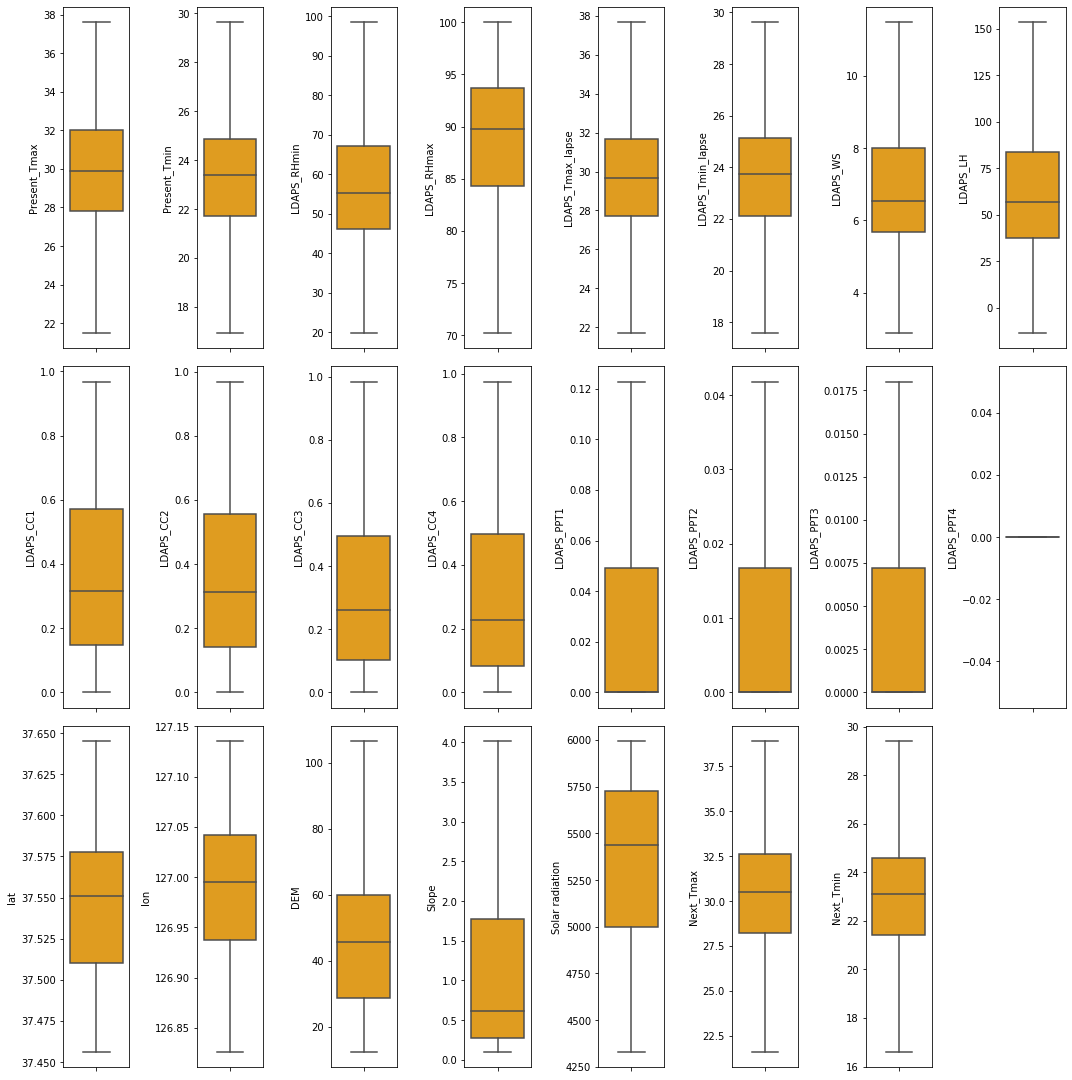

In [997]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 8
nrows = 8
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

In [998]:
#now the outliers have been removed for all the columns

## Skewness Reduction

In [999]:
#lets devide X and Y before handing skewness
#Note : we have two target columns in this dataset

Y1 = df['Next_Tmax'] # Y1 is Next_Tmax

Y2 = df['Next_Tmin']  #  Y2is Next_Tmin

X = df.drop(['Next_Tmax','Next_Tmin'],axis = 1)

In [1000]:
#lets create a list of numerical columns in X
Numerical_columns_X = []
for i in X.columns:
    if X[i].dtype != 'object':
        Numerical_columns_X.append(i)

In [1001]:
#Lets check for skewness in numerical columns
X[Numerical_columns_X].skew()

Present_Tmax       -0.255196
Present_Tmin       -0.261009
LDAPS_RHmin         0.300226
LDAPS_RHmax        -0.738462
LDAPS_Tmax_lapse   -0.167690
LDAPS_Tmin_lapse   -0.416531
LDAPS_WS            0.821395
LDAPS_LH            0.602904
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          1.169549
LDAPS_PPT2          1.170217
LDAPS_PPT3          1.175235
LDAPS_PPT4          0.000000
lat                 0.086942
lon                -0.285300
DEM                 0.729986
Slope               1.181369
Solar radiation    -0.511006
dtype: float64

In [1002]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = Numerical_columns_X
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X[Numerical_columns_X].skew()

Present_Tmax       -0.255196
Present_Tmin       -0.261009
LDAPS_RHmin         0.300226
LDAPS_RHmax        -0.114996
LDAPS_Tmax_lapse   -0.167690
LDAPS_Tmin_lapse   -0.416531
LDAPS_WS            0.017211
LDAPS_LH            0.018820
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.089606
LDAPS_CC4           0.129753
LDAPS_PPT1          0.989747
LDAPS_PPT2          1.022914
LDAPS_PPT3          1.031726
LDAPS_PPT4          0.000000
lat                 0.086942
lon                -0.285300
DEM                -0.021157
Slope               0.214291
Solar radiation    -0.176686
dtype: float64

## Encoding the Object Columns

In [1003]:
#we converted station, month and year as object column
#lets encode them now

for i in X.columns:
    if X[i].dtype == 'object':
        print(i)

station
Month
Year


In [1004]:
#lets check the shape before encoding
X.shape

(7750, 24)

In [1005]:
#lets convert the above three column using get dummy method
X_new = pd.get_dummies(data = X,columns= ['station','Month','Year'])

In [1006]:
#lets check the shape after encoding
X_new.shape

(7750, 63)

In [1007]:
#now we have 63 input columns after encoding
X_new.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,station_1.0,station_2.0,station_3.0,station_4.0,station_5.0,station_6.0,station_7.0,station_8.0,station_9.0,station_10.0,station_11.0,station_12.0,station_13.0,station_14.0,station_15.0,station_16.0,station_17.0,station_18.0,station_19.0,station_20.0,station_21.0,station_22.0,station_23.0,station_24.0,station_25.0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,28.7,21.4,58.255688,0.274059,28.074101,23.006936,0.082450,0.322445,0.233947,0.203896,-0.538510,-0.580480,-0.656512,-0.637002,-0.628708,0.0,37.6046,126.991,1.541097,1.354664,1.850167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,31.9,21.6,52.263397,0.186775,29.850689,24.035009,-0.648328,-0.203407,0.225508,0.251771,-0.550985,-0.599355,-0.656512,-0.637002,-0.628708,0.0,37.6046,127.032,0.043713,-0.390170,1.401217,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,31.6,23.3,48.690479,-0.779952,30.091292,24.565633,-0.336897,-1.390953,0.209344,0.257469,-0.313567,-0.515519,-0.656512,-0.637002,-0.628708,0.0,37.5776,127.058,-0.429814,-0.953463,1.381155,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,32.0,23.4,58.239788,1.315491,29.704629,23.326177,-0.679225,0.215760,0.216372,0.226002,-0.541492,-0.561044,-0.656512,-0.637002,-0.628708,0.0,37.6450,127.022,0.078199,1.271372,1.358278,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,31.4,21.9,56.174095,0.111683,29.113934,23.486480,-0.616811,1.311025,0.151407,0.249995,-0.445066,-0.360578,-0.656512,-0.637002,-0.628708,0.0,37.5507,127.135,-0.349982,-0.406631,1.367247,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


## Scaling the Data

In [1008]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X_new),columns= X_new.columns)
scaled_X.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,station_1.0,station_2.0,station_3.0,station_4.0,station_5.0,station_6.0,station_7.0,station_8.0,station_9.0,station_10.0,station_11.0,station_12.0,station_13.0,station_14.0,station_15.0,station_16.0,station_17.0,station_18.0,station_19.0,station_20.0,station_21.0,station_22.0,station_23.0,station_24.0,station_25.0,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,-0.362538,-0.776536,0.102641,0.274059,-0.532360,-0.232769,0.082450,0.322445,-0.514235,-0.590994,-0.538510,-0.580480,-0.656512,-0.637002,-0.628708,0.0,1.189704,-0.005038,1.541097,1.354664,1.850167,4.898979,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.182574,-0.182574,-0.182574,-0.182574,-0.182574,4.434712,-0.715678,-0.690066,-0.182574,-0.182574,-0.182574,-0.182574,2.0,-0.5,-0.5,-0.5,-0.5
1,0.722162,-0.692021,-0.308235,0.186775,0.079109,0.219864,-0.648328,-0.203407,-0.546553,-0.404515,-0.550985,-0.599355,-0.656512,-0.637002,-0.628708,0.0,1.189704,0.511327,0.043713,-0.390170,1.401217,-0.204124,4.898979,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.182574,-0.182574,-0.182574,-0.182574,-0.182574,4.434712,-0.715678,-0.690066,-0.182574,-0.182574,-0.182574,-0.182574,2.0,-0.5,-0.5,-0.5,-0.5
2,0.620472,0.026361,-0.553222,-0.779952,0.161920,0.453483,-0.336897,-1.390953,-0.608455,-0.382321,-0.313567,-0.515519,-0.656512,-0.637002,-0.628708,0.0,0.653264,0.838778,-0.429814,-0.953463,1.381155,-0.204124,-0.204124,4.898979,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.182574,-0.182574,-0.182574,-0.182574,-0.182574,4.434712,-0.715678,-0.690066,-0.182574,-0.182574,-0.182574,-0.182574,2.0,-0.5,-0.5,-0.5,-0.5
3,0.756059,0.068618,0.101551,1.315491,0.028838,-0.092216,-0.679225,0.215760,-0.581540,-0.504887,-0.541492,-0.561044,-0.656512,-0.637002,-0.628708,0.0,1.992377,0.385384,0.078199,1.271372,1.358278,-0.204124,-0.204124,-0.204124,4.898979,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.182574,-0.182574,-0.182574,-0.182574,-0.182574,4.434712,-0.715678,-0.690066,-0.182574,-0.182574,-0.182574,-0.182574,2.0,-0.5,-0.5,-0.5,-0.5
4,0.552678,-0.565247,-0.040088,0.111683,-0.174468,-0.021639,-0.616811,1.311025,-0.830324,-0.411433,-0.445066,-0.360578,-0.656512,-0.637002,-0.628708,0.0,0.118811,1.808536,-0.349982,-0.406631,1.367247,-0.204124,-0.204124,-0.204124,-0.204124,4.898979,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.204124,-0.182574,-0.182574,-0.182574,-0.182574,-0.182574,4.434712,-0.715678,-0.690066,-0.182574,-0.182574,-0.182574,-0.182574,2.0,-0.5,-0.5,-0.5,-0.5


In [1009]:
#now our data is scaled using standard scaler

## PCA (Principal Component Analysis):

In [1010]:
#we need to use pca becuase we have 63 columns in this dataset which is very high

In [1011]:
#we should always use scaled data for performing the PCA

In [1012]:
#we have 63 columns excluding target variable
scaled_X.shape

(7750, 63)

In [1013]:
#first lets TEST out percentage of data that we will obtain after PCA
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [1014]:
#now lets check out cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score  

array([  9.4668081 ,  15.1645443 ,  19.40855208,  23.12543419,
        26.54536116,  29.6999196 ,  32.47930634,  35.05650078,
        37.26919164,  39.37049204,  41.42514703,  43.45496378,
        45.36329183,  47.19959243,  49.01926512,  50.77148682,
        52.5029648 ,  54.20950997,  55.9077309 ,  57.60008076,
        59.28639019,  60.96715784,  62.64742594,  64.32763228,
        66.00775827,  67.68788228,  69.36799233,  71.04809985,
        72.72820738,  74.40831491,  76.08842243,  77.76851742,
        79.44859321,  81.12854395,  82.80795081,  84.48424124,
        86.15839029,  87.82789169,  89.49679026,  91.1280203 ,
        92.67082421,  94.08429006,  95.20811549,  96.11994444,
        96.83055727,  97.44277265,  97.91860412,  98.34875245,
        98.72039505,  99.04699418,  99.35127233,  99.5610907 ,
        99.76117998,  99.90882654, 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        ])

In [1015]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 42


In [1016]:
#lets check how many columns gives 90% of variance
s = np.argmax(cum_score > 90)
print("Number of components expaining 90% of variance is :", s)

Number of components expaining 90% of variance is : 39


In [1017]:
#now we have seen that how much data will be lost based number of columns

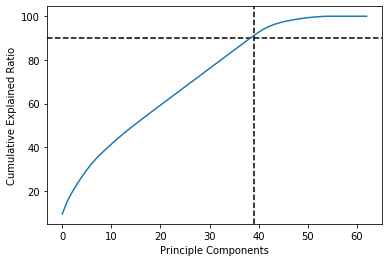

In [1018]:
#lets plot the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 90, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

In [1019]:
#lets perform the PCA with 39 columns for retriveing 90% of data
Final_pca = PCA(n_components= 39)

pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [1020]:
print("variance is : {}".format(np.sum(Final_pca.explained_variance_ratio_)))

variance is : 0.8949670803090289


In [1021]:
#almost 90% of our data is intact

In [1022]:
pca_x.shape

(7750, 39)

# Model Selection 

## Best random state with Y1 (Next_Tmax)

In [1023]:
max_r2score_1 = 0
rand_state_1 = 0
for i in range(1,200):
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(pca_x,Y1,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train_1,y_train_1)
    pred_1 = lr.predict(x_test_1)
    r2_1 = r2_score(y_test_1,pred_1)
    if r2_1 > max_r2score_1:
        max_r2score_1 = r2_1
        rand_state_1 = i
print('Best r2 score is {} on random state {}'.format(max_r2score_1,rand_state_1)) 

Best r2 score is 0.7615405742492264 on random state 145


In [1024]:
print('We got our best randoms sate as :',rand_state_1)

We got our best randoms sate as : 145


In [1025]:
#Lets split for train and test data
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(pca_x,Y1,test_size=.22,random_state= rand_state_1)

## Model selection for Y1 (Next_Tmax):

In [1026]:
#lets Choose r2 score of below five Models
lr = LinearRegression()
dtc = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [1027]:
#checking each model with Cross val score
model_list = [lr,dtc,knn,ada,rf]
least_difference_1 = []
for m in model_list:
    m.fit(x_train_1,y_train_1)
    pred_1 = m.predict(x_test_1)
    cvs = cross_val_score(m,pca_x,Y1,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test_1,pred_1))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test_1,pred_1))
    print('mean squared error : ', mean_squared_error(y_test_1,pred_1))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test_1,pred_1)))
    print('Difference :')
    difference = np.abs(r2_score(y_test_1,pred_1) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference_1.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



LinearRegression()
Scores :
r2 score: 0.7615405742492264
Cross Val score : 0.1316517651577111
Error :
mean absolute error : 1.1861718027067922
mean squared error :  2.3812378058055073
root mean squared error : 1.5431259850723489
Difference :
Diffrence between cross val score and r2 score is : 0.63


DecisionTreeRegressor()
Scores :
r2 score: 0.5882942948048528
Cross Val score : 0.2484025576184246
Error :
mean absolute error : 1.4848972278374095
mean squared error :  4.111262060578541
root mean squared error : 2.027624733667091
Difference :
Diffrence between cross val score and r2 score is : 0.34


KNeighborsRegressor()
Scores :
r2 score: 0.5734382395080748
Cross Val score : 0.45099639639879097
Error :
mean absolute error : 1.6076421490191612
mean squared error :  4.259613506139758
root mean squared error : 2.0638831134877185
Difference :
Diffrence between cross val score and r2 score is : 0.12


AdaBoostRegressor()
Scores :
r2 score: 0.6263188852890372
Cross Val score : 0.48590708760

In [1028]:
#we can see that linear regression getting overfitted with this data

In [1029]:
#lets check the least diference between cross val score and r2 score for each model
least_difference_1

[(LinearRegression(),
  'Diffrence between cross val score and r2 score error is : 0.63'),
 (DecisionTreeRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.34'),
 (KNeighborsRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.12'),
 (AdaBoostRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.14'),
 (RandomForestRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.23')]

In [1030]:
#we got KNN regressor for as best model for Y1(Next_Tmax), since the model is not overfittid

## Best random state with Y2 (Next_Tmin)

In [1031]:
max_r2score_2 = 0
rand_state_2 = 0
for j in range(1,200):
    x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(pca_x,Y2,test_size=.22,random_state= j )
    lr = LinearRegression()
    lr.fit(x_train_2,y_train_2)
    pred_2 = lr.predict(x_test_2)
    r2_2 = r2_score(y_test_2,pred_2)
    if r2_2 > max_r2score_2:
        max_r2score_2 = r2_2
        rand_state_2 = j
print('Best r2 score is {} on random state {}'.format(max_r2score_2,rand_state_2)) 

Best r2 score is 0.8104369149000672 on random state 36


In [1032]:
print('We got our best randoms sate as :',rand_state_2)

We got our best randoms sate as : 36


In [1033]:
#Lets split for train and test data
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(pca_x,Y2,test_size=.22,random_state= rand_state_2)

## Model Selection for Y2 (Next_Tmin)

In [1034]:
#checking each model with Cross val score
model_list = [dtc,knn,ada,rf]
least_difference_2 = []
for m in model_list:
    m.fit(x_train_2,y_train_2)
    pred_2 = m.predict(x_test_2)
    cvs = cross_val_score(m,pca_x,Y2,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test_2,pred_2))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test_2,pred_2))
    print('mean squared error : ', mean_squared_error(y_test_2,pred_2))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test_2,pred_2)))
    print('Difference :')
    difference = np.abs(r2_score(y_test_2,pred_2) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference_2.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



DecisionTreeRegressor()
Scores :
r2 score: 0.6572346812110262
Cross Val score : 0.3202647938772619
Error :
mean absolute error : 1.1193001053440765
mean squared error :  2.1595207374606016
root mean squared error : 1.4695307881975803
Difference :
Diffrence between cross val score and r2 score is : 0.34


KNeighborsRegressor()
Scores :
r2 score: 0.580357038297171
Cross Val score : 0.4356257592447535
Error :
mean absolute error : 1.270777062703452
mean squared error :  2.6438721435658747
root mean squared error : 1.6259988141342154
Difference :
Diffrence between cross val score and r2 score is : 0.14


AdaBoostRegressor()
Scores :
r2 score: 0.7386746137771365
Cross Val score : 0.6290643589685463
Error :
mean absolute error : 1.0342410106502293
mean squared error :  1.6464255857828305
root mean squared error : 1.28313116468381
Difference :
Diffrence between cross val score and r2 score is : 0.11


RandomForestRegressor()
Scores :
r2 score: 0.8491366361556931
Cross Val score : 0.64883680

In [1035]:
#lets check the least diference between cross val score and r2 score for each model
least_difference_2

[(DecisionTreeRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.34'),
 (KNeighborsRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.14'),
 (AdaBoostRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.11'),
 (RandomForestRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.20')]

In [1036]:
#we got ADAboost regressor as the best model for Y2 for Y1(Next_Tmin), since the model is not overfittid

# Hyperparmeter Tuning for both the models

## 1. Hyperparamter Tuning for Y1 (Next_Tmax)  : KNN Regressor

In [1037]:
#since we choose Knn regressor for Y1(Next_Tmax), lets perform hyperparameter tuning

In [1038]:
#lets create the parameter list to pass in Randomised seracgh cv
parameters = {'n_neighbors':list(range(5,16,2)),'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':list(range(25,35))}
#using randomised search CV
gsvkn = RandomizedSearchCV(estimator= knn , param_distributions= parameters,cv =5)
gsvkn.fit(x_train_1,y_train_1) 
print(gsvkn.best_score_)
print(gsvkn.best_params_)

0.5648564751370555
{'weights': 'distance', 'n_neighbors': 15, 'leaf_size': 32, 'algorithm': 'brute'}


In [1039]:
#we got our best parametrs for hyperparamter tuning using randomized serach cv for y1
best_params_y1 = {'weights': 'distance', 'n_neighbors': 13, 'leaf_size': 26, 'algorithm': 'auto'}

## 2.Hyperparamter Tuning for Y2 (Next_Tmin) : ADAboost Regressor

In [1040]:
#since we choose Adaboost regressor for Y2(Next_Tmin), lets perform hyperparameter tuning

In [1041]:
#lets create the parameter list to pass in Randomised serach cv
parameters = {'n_estimators' : list(range(50,251,50)), 'loss' : ['linear', 'square', 'exponential']}
#using randomised search CV
gsvada = RandomizedSearchCV(estimator= ada , param_distributions= parameters,cv =5)
gsvada.fit(x_train_2,y_train_2) 
print(gsvada.best_score_)
print(gsvada.best_params_)

0.72953970925613
{'n_estimators': 250, 'loss': 'square'}


In [1042]:
#we got our best parametrs for hyperparamter tuning using randomized serach cv for y2
best_params_y2 = {'n_estimators': 100, 'loss': 'square'}

# Creating a Final Model for Y1 and Y2

In [1043]:
#Since we already selected the model for both y1 and y2
#And also hyperparameter tuning is done for both the model
#Lets create our final model

##  1.Final Model  for Y1 (Next_Tmax)  : KNN Regressor

In [1044]:
#Lets use our best parameters obtained from hyperparameter tuning
best_params_y1

{'weights': 'distance',
 'n_neighbors': 13,
 'leaf_size': 26,
 'algorithm': 'auto'}

In [1045]:
#since we got knn as our best model for y1(Next_Tmax)
#This model is not overfitting
#lets create our final model

final_knn_y1 = KNeighborsRegressor(n_neighbors = 13, weights = 'distance' ,leaf_size = 26,algorithm = 'auto')
final_knn_y1.fit(x_train_1,y_train_1)
final_pred_y1 = final_knn_y1.predict(x_test_1)
cvs_1 = cross_val_score(final_knn_y1,pca_x,Y1,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test_1,final_pred_y1))
print('Cross Val score :',cvs_1.mean())
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test_1,final_pred_y1))
print('mean squared error : ', mean_squared_error(y_test_1,final_pred_y1))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test_1,final_pred_y1)))
print('\n')
print('Difference :')
difference_1 = np.abs(r2_score(y_test_1,final_pred_y1) - cvs_1.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference_1))



Scores :
r2 score: 0.61549792835206
Cross Val score : 0.505205257924349


Error :
mean absolute error : 1.5674670207605652
mean squared error :  3.839608631682039
root mean squared error : 1.9594919320277997


Difference :
Diffrence between cross val score and r2 score is : 0.11


In [1046]:
#we got our final model for Next_Tmax (y1) with 50.5 % accuracy and no overfitting in this model

## 2.Final Model  for Y2 (Next_Tmin)  : ADA boost Regressor

In [1047]:
#Lets use our best parameters obtained from hyperparameter tuning
best_params_y2

{'n_estimators': 100, 'loss': 'square'}

In [1048]:
#since we got knn as our best model for y1(Next_Tmax)
#This model is not overfitting
#lets create our final model

final_ada_y2 = AdaBoostRegressor(n_estimators = 100 , loss = 'square')
final_ada_y2.fit(x_train_2,y_train_2)
final_pred_y2 = final_ada_y2.predict(x_test_2)
cvs_2 = cross_val_score(final_ada_y2,pca_x,Y2,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test_2,final_pred_y2))
print('Cross Val score :',cvs_2.mean())
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test_2,final_pred_y2))
print('mean squared error : ', mean_squared_error(y_test_2,final_pred_y2))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test_2,final_pred_y2)))
print('\n')
print('Difference :')
difference_2 = np.abs(r2_score(y_test_2,final_pred_y2) - cvs_2.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference_2))



Scores :
r2 score: 0.7623881665935582
Cross Val score : 0.636238698528788


Error :
mean absolute error : 0.9858206635490578
mean squared error :  1.4970233380675129
root mean squared error : 1.2235290507656582


Difference :
Diffrence between cross val score and r2 score is : 0.13


In [1066]:
#we got our final model for Next_Tmin (y2) with 76 % accuracy and less overfitting compare to all the models

# Saving the Best Models of both Y1 (Next_Tmax) and Y2 (Next_Tmin)

## 1.Serialization for Y1(Next_Tmax)

In [1050]:
#serialization using joblib
import joblib
joblib.dump(final_knn_y1,'Temperature_Max.obj')

['Temperature_Max.obj']

In [1051]:
Temperature_Max = joblib.load('Temperature_Max.obj')

In [1052]:
#lets predict using our obj file
max_temp_pred = Temperature_Max.predict(x_test_1)

In [1053]:
#lets check out the score, to verify
r2_score(y_test_1,max_temp_pred)

0.61549792835206

In [1054]:
#now serialization is completed for Y1(Next_Tmax) prediction, It is working Fine

## 2.Serialization for Y2(Next_Tmin)

In [1055]:
#serialization using joblib
import joblib
joblib.dump(final_ada_y2,'Temperature_Min.obj')

['Temperature_Min.obj']

In [1056]:
Temperature_Min = joblib.load('Temperature_Min.obj')

In [1057]:
#lets predict using our obj file
min_temp_pred = Temperature_Min.predict(x_test_2)

In [1058]:
#lets check out the score, to verify
r2_score(y_test_2,min_temp_pred)

0.7623881665935582

In [1059]:
#now serialization is completed for Y2(Next_Tmin) prediction, It is working Fine

# Plotting y_test vs predicted

## 1. Y1 (Next_Tmax)

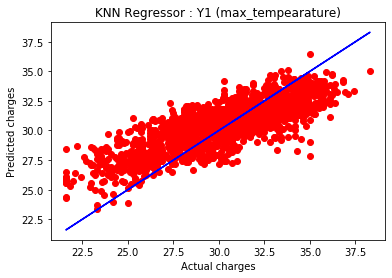

In [1060]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test_1,y = max_temp_pred,color = 'r')
plt.plot(y_test_1,y_test_1,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('KNN Regressor : Y1 (max_tempearature)')
plt.show()

## 2. Y2 (Next_Tmin)

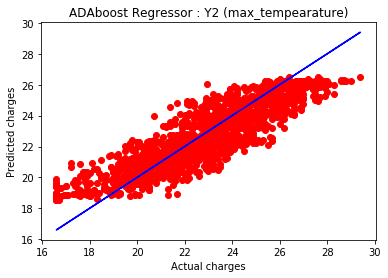

In [1061]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test_2,y = min_temp_pred,color = 'r')
plt.plot(y_test_2,y_test_2,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('ADAboost Regressor : Y2 (max_tempearature)')
plt.show()

# Conclusion

## 1. Y1 (Next_Tmax)

In [1062]:
#lets make a dataframe of actual answers vs predicted answers
conclusion1 = pd.DataFrame((Temperature_Max.predict(x_test_1)[:],y_test_1[:]),index= ['Predicted','Actual'])
conclusion1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [1063]:
#we can see that actual and predicted values are very close for maximum temperature

## 2. Y2 (Next_Tmin)

In [1064]:
#lets make a dataframe of actual answers vs predicted answers
conclusion2 = pd.DataFrame((Temperature_Min.predict(x_test_2)[:],y_test_2[:]),index= ['Predicted','Actual'])
conclusion2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [1065]:
#we can see that actual and predicted values are very close for minimum temperature